<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls '/content/drive/MyDrive/py-master/ML/13_kmeans/'

13_kmeans_tutorial.ipynb  Exercise  income.csv	iris.png


In [9]:
!pip install kneed

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


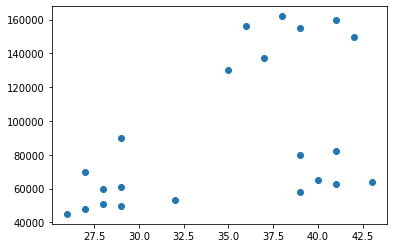

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [13]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
 ypred= km.fit_predict(df[['Age','Income($)']])
 ypred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [15]:
df['cluster']=ypred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


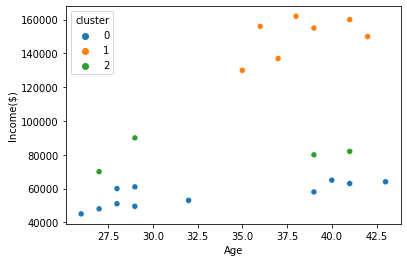

In [16]:
import seaborn as sns
sns.scatterplot(df.Age,df['Income($)'], data=df, hue='cluster', palette='tab10')
plt.show()

In [17]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


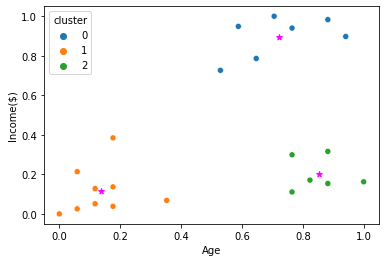

In [18]:
km = KMeans(n_clusters=3)
ypred= km.fit_predict(df[['Age','Income($)']])
df['cluster']=ypred
import seaborn as sns
sns.scatterplot(df.Age,df['Income($)'], data=df, hue='cluster', palette='tab10')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='Magenta', marker="*")
plt.show()

In [19]:
k_rng = range(1,11)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

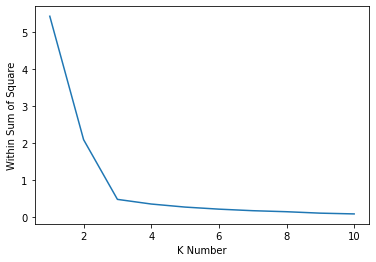

In [20]:
plt.xlabel('K Number')
plt.ylabel('Within Sum of Square')
plt.plot(k_rng,sse)

In [22]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[['Age','Income($)']])
    score = silhouette_score(df[['Age','Income($)']], kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

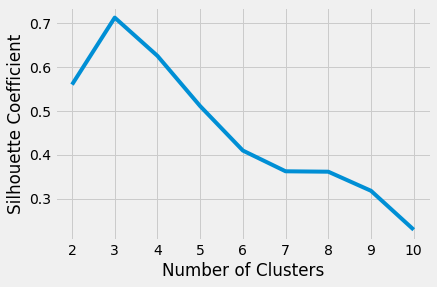

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()